In [161]:
import pandas as pd
import nltk
from nltk.stem.lancaster import LancasterStemmer
from collections import Counter # Could have used import collections, but this allows us to do just Counter, rather than collections.Counter

Pandas makes things a bit more like working with a spreadsheet. 

Panda has two common data structures:

 - Series (for one-dimensional data)
 - DataFrame (for two-dimensional data)
 
Our goal:

| Narrators: | A | Betteredge | Clack | Bruff | Blake |
| --- | --- | --- | --- | --- | --- |
| Words: | I     |  300   |     345  |  234  |  454 |
|    B  | him  |   34    |     11  |   17  |   16 |

In [110]:
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()

moonstoneParts = moonstone.split('##')

betteredge = moonstoneParts[5:29]
betteredgeString = " ".join(betteredge)
clack = moonstoneParts[31:39]
clackString = " ".join(clack)
bruff = moonstoneParts[40:43]
bruffString = " ".join(bruff)
blake = moonstoneParts[44:53]
blakeString = " ".join(blake)
ezraString = moonstoneParts[54]
blake2 = moonstoneParts[55:57]
blake2String = " ".join(blake2)

cuff = moonstoneParts[58:62]
cuffString = " ".join(cuff)
candyString = moonstoneParts[63]
betteredge2 = moonstoneParts[64:65]
betteredge2String = " ".join(betteredge2)

cuffManString = moonstoneParts[66]
captainString = moonstoneParts[67]
murthwaiteString = moonstoneParts[68]




In [5]:
counts = { 'betteredge': { "I": 300, "him": 34}, 'clack': { "I", 200, "him: 345"}}

In [10]:
moonstoneParts2 = moonstone.split('\n## ')

In [112]:
clack, bruff, blake = moonstoneParts2[3:6]
betteredge = '\n'.join(moonstoneParts[5:29])

In [162]:
stemmer = LancasterStemmer()

In [163]:
def counted(textString):
    lowered = textString.lower()
    lowered = lowered.replace('–', ' – ')
    lowered = lowered.replace('*', ' ')
    
    tokens = nltk.word_tokenize(lowered)
    stems = [stemmer.stem(token) for token in tokens]
    counted = Counter(stems)
    return counted

In [54]:
def numWords(textString):
    lowered = textString.lower()
    tokens = nltk.word_tokenize(lowered)
    return len(tokens)

In [164]:
allCounts = { 
    "betteredge": counted(betteredge), 
    "clack": counted(clack), 
    "bruff": counted(bruff), 
    "blake": counted(blake),
#    "ezra": counted(ezraString),
#    "blake2" : counted(blake2String),
#    "cuff": counted(cuffString),
#    "candy": counted(candyString),
#    "betteredge2": counted(betteredge2String),
#    "cuff's man": counted(cuffManString),
#    "captain": counted(captainString),
#    "murthwaite": counted(murthwaiteString),  
}
            

In [123]:
allNumWords = [numWords(narrator) for narrator in [
    betteredge, 
    clack, 
    bruff, 
    blake, 
#    ezraString,
#    blake2String,
#    cuffString,
#    candyString,
#    betteredge2String,
#    cuffManString,
#    captainString,
#    murthwaiteString 
]]
allNumWords

[94869, 36259, 12132, 52217]

In [165]:
narratorsDF = pd.DataFrame(allCounts).fillna(0)

In [167]:
narratorsDF#.sort_values(by='betteredge')

betteredge   clack  bruff   blake
#                24.0    24.0    9.0    30.0
first           135.0    35.0   31.0    87.0
period            7.0     3.0    4.0     2.0
the            4865.0  1608.0  678.0  2621.0
loss             27.0     5.0    6.0    15.0
...               ...     ...    ...     ...
keeping.          0.0     0.0    0.0     1.0
irrevoc           0.0     0.0    0.0     1.0
reassembl         0.0     0.0    0.0     2.0
reassum           0.0     0.0    0.0     1.0
was.              0.0     0.0    0.0     1.0

[5164 rows x 4 columns]

In [168]:
narratorsFreqDF = narratorsDF / allNumWords

Pandas supports dictionary access, so to get a column in Pandas, you can do:

narratorsFreqDF['betteredge']

To get a ro

narratorsFreqDF.loc['the']

In [169]:
narratorsFreqDF.loc[['diamond','moonstone']].plot(kind='bar')

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

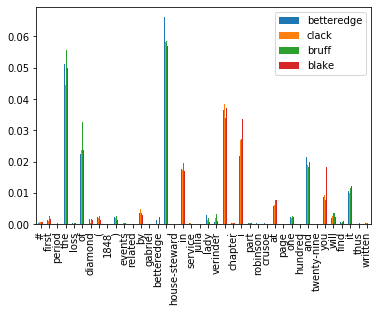

In [130]:
narratorsFreqDF.head(40).plot(kind='bar')

# Finding distincitve words

As distinctive word is used by one category way more than the average

In [135]:
narratorsFreqDF['average'] = narratorsFreqDF.mean(axis=1)

In [137]:
narratorsFreqDF.loc['!']

betteredge    0.003531
clack         0.006840
bruff         0.002226
blake         0.004788
average       0.004346
Name: !, dtype: float64

We define 'Clackness' as the frequency of the word in Miss Clack's narrative more than the average

In [139]:
narratorsFreqDF.loc['!']['clack'] - narratorsFreqDF.loc['!']['average']

0.0024936565845637016

In [141]:
clackness = narratorsFreqDF['clack'] - narratorsFreqDF['average']

In [143]:
clackness.sort_values(ascending=False).head(40)

!            0.002494
she          0.002225
godfrey      0.002160
aunt         0.002037
.            0.001893
my           0.001819
dear         0.001701
rachel       0.001558
her          0.001518
a            0.001483
ablewhite    0.001263
–            0.001096
clack        0.001033
by           0.001015
not          0.000930
words        0.000799
is           0.000758
oh           0.000650
are          0.000610
miss         0.000591
has          0.000580
bruff        0.000548
christian    0.000517
be           0.000517
room         0.000481
am           0.000480
precious     0.000479
friends      0.000452
don          0.000446
quite        0.000440
even         0.000438
mother       0.000435
drusilla     0.000434
but          0.000428
such         0.000406
son          0.000395
poor         0.000395
never        0.000394
our          0.000359
worldly      0.000352
dtype: float64

In [155]:
def distinctiveWords(narrator, df):
    """Get a series of the distinctive words for a narrator"""
    return df[narrator] - df['average']

def mostDistinctiveWords(narrator, df):
    """Get a series of the most distinctive words for a narrator"""
    return distinctiveWords(narrator, df).sort_values(ascending=False).head(40)
    
def leastDistinctiveWords(narrator, df):
    """Get a series of the least distinctive words for a narrator"""
    return distinctiveWords(narrator, df).sort_values(ascending=True).head(40)

In [159]:
mostDistinctiveWords('betteredge', narratorsFreqDF)

,                 0.006285
sergeant          0.002866
franklin          0.002420
’                 0.001975
and               0.001843
as                0.001547
out               0.001547
rosanna           0.001478
a                 0.001400
cuff              0.001361
she               0.001165
lady              0.001124
says              0.001109
s                 0.001022
her               0.000991
the               0.000979
penelope          0.000858
girl              0.000711
about             0.000688
t                 0.000673
said              0.000629
;                 0.000616
way               0.000608
our               0.000602
up                0.000594
miss              0.000579
them              0.000569
got               0.000568
with              0.000557
mistress          0.000536
superintendent    0.000533
spearman          0.000527
when              0.000517
came              0.000510
went              0.000489
servants          0.000489
house             0.000482
u

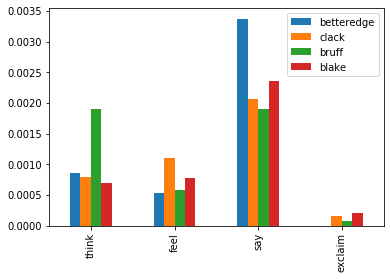

In [170]:
# Look at verb stems
narratorsFreqDF.loc[['think','feel','say','exclaim']].plot(kind='bar')

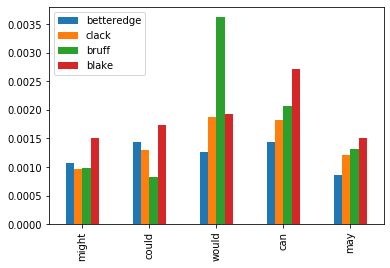

In [172]:
# Look at modals stems
narratorsFreqDF.loc[['might','could','would','can','may']].plot(kind='bar')

Blake uses these a ton, you'd need to understand the context, by going back and re-reading - or turn in to a nltk text object after tokenising and run concordance

In [176]:
blakeText = nltk.Text(nltk.word_tokenize(blake))
blakeText.concordance('can')

Displaying 25 of 139 matches:
 on an answer , ” he said , “ I own I can place no other interpretation on her 
ards me . If time , pains , and money can do it , I will lay my hand on the thi
 I left it , which Gabriel Betteredge can supply , and to Gabriel Betteredge I 
 kitchen all that your fondest wishes can desire. ’ For the rest of that woman 
rm , barely two miles from here . You can hardly object to *that* on Miss Rache
–by meddling with the Moonstone . How can *you* hope to succeed ( saving your p
ust to worse than me , Mr. Franklin–I can tell you that , ” he said a little sh
Cuff has left behind him . I know you can do that . Can you do no more ? ” “ Wh
behind him . I know you can do that . Can you do no more ? ” “ What more can yo
 . Can you do no more ? ” “ What more can you expect from me , sir ? ” asked Be
f her secret will reveal nothing that can alter her place in your estimation , 
. Franklin , ” he exclaimed , “ all I can say is–I am as innocent of seeing it 
t of seein